In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
from xgboost import XGBRegressor

In [96]:
file_path = 'music_dataset.csv'
df = pd.read_csv(file_path)

In [97]:
target = 'Peak Position'
X = df.drop(columns=[target])
y = df[target]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [99]:
y_pred = model.predict(X_test)

In [100]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

In [101]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 0.8958953540532686
Mean Squared Error (MSE): 1.064280281290111
Root Mean Squared Error (RMSE): 1.031639608240257
R-squared (R2): -0.03351684271544508


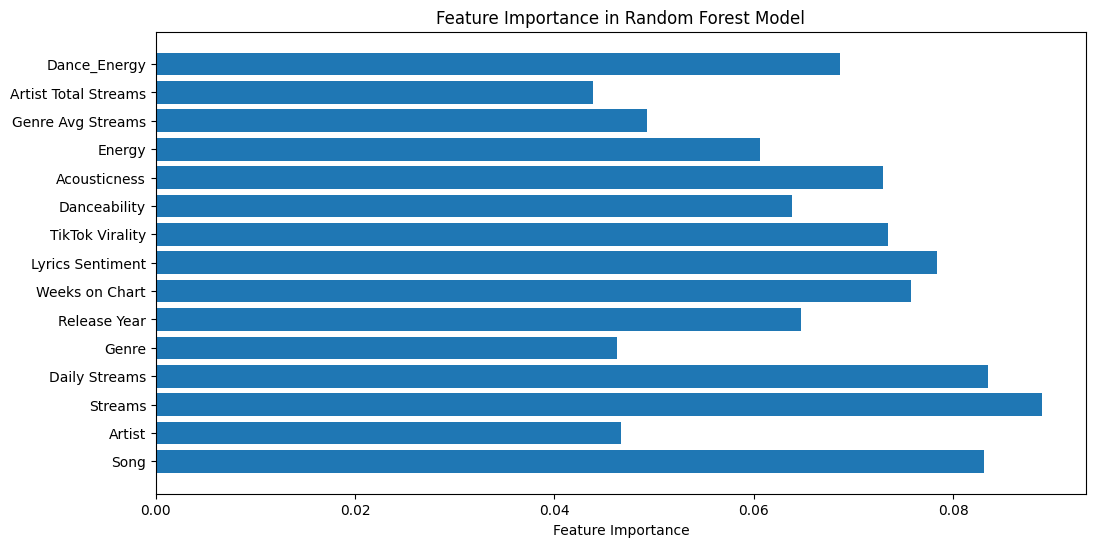

In [102]:
feature_importance = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(12, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()

In [103]:
joblib.dump(model, 'Saved_Models/Random_Forest.pkl')
print("Model training completed. Model saved to 'Saved_Models/Random_Forest.pkl'")

Model training completed. Model saved to 'Saved_Models/Random_Forest.pkl'


In [104]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

In [105]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_root_mean_squared_error')

In [106]:
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [107]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [108]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

In [109]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 0.8867162703724596
Mean Squared Error (MSE): 1.0330261753345835
Root Mean Squared Error (RMSE): 1.016378952622782
R-squared (R2): -0.003166148939652169


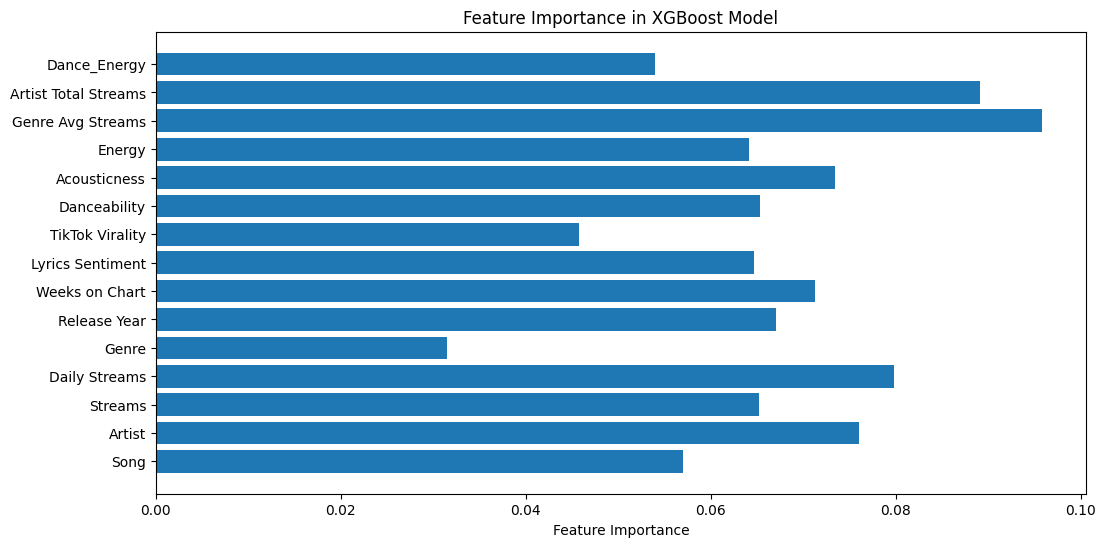

In [110]:
feature_importance = best_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(12, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in XGBoost Model')
plt.show()

In [111]:
joblib.dump(best_model, 'Saved_Models/xgb.pkl')
print("Model training completed. Best model saved to 'Saved_Models/xgb.pkl'")

Model training completed. Best model saved to 'Saved_Models/xgb.pkl'


In [112]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'l1_ratio': [0.2, 0.5, 0.8]
}

In [113]:
elastic_net = ElasticNet(random_state=42, max_iter=10000)
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             n_jobs=-1,
             param_grid={'alpha': [0.1, 1.0, 10.0],
                         'l1_ratio': [0.2, 0.5, 0.8]},
             scoring='neg_root_mean_squared_error')

In [114]:
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.8}


In [115]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [116]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

In [117]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 0.8865174059828499
Mean Squared Error (MSE): 1.033066899982299
Root Mean Squared Error (RMSE): 1.0163989866102283
R-squared (R2): -0.003205696425467419


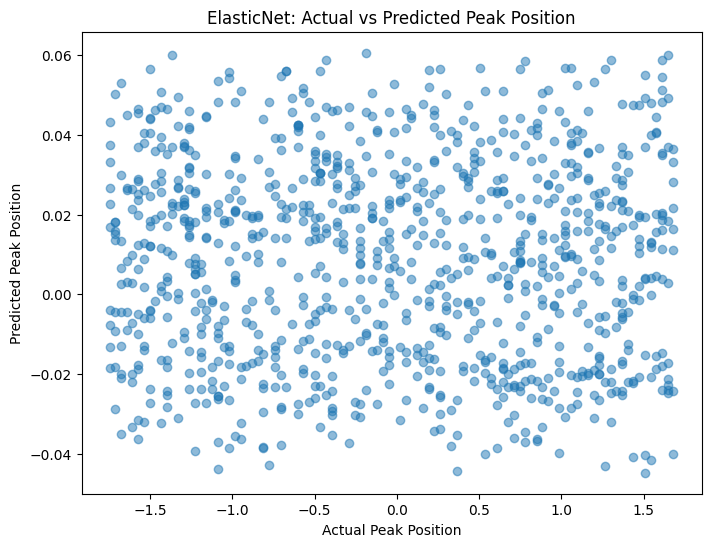

In [118]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Peak Position')
plt.ylabel('Predicted Peak Position')
plt.title('ElasticNet: Actual vs Predicted Peak Position')
plt.show()


In [119]:
joblib.dump(best_model, 'Saved_Models/elasticnet.pkl')
print("Model training completed. Best model saved to 'Saved_Models/elasticnet.pkl'")

Model training completed. Best model saved to 'Saved_Models/elasticnet.pkl'
